## **Classificação Multiclasses Reuters**

**Livro: Deep Learning With python**

**3.5 - Classificação Multiclasses**

Para mais detalhes e explicação completa do código visite: 


O objetivo desse código é desenvolver um modelo que consiga realizar a classificação de notícias de acordo com a descrição. Assim como no modelo do IMDB, é retirado as palavras mais frequentes da descrição e através delas o modelo é treinado para encaixar a notícia em uma das 16 possibilidades. Aqui não mais teremos um resultado 0 ou 1, positivo ou negativo, mas sim 16 possíveis alternativas. 

O dataset faz parte do pacote keras e pode encontrar mais detalhes no site: 
https://keras.io/api/datasets/reuters/


In [1]:
#Importando o dataset
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [2]:
#tamanho dos dados de treinamento
len(train_data)

8982

In [3]:
#tamanho dos dados de teste
len(test_data)

2246

In [4]:
#visualizando a 50 descrição de notícia
train_data[50]

[1,
 1479,
 1197,
 71,
 8,
 25,
 1479,
 1197,
 640,
 71,
 304,
 471,
 80,
 9,
 1379,
 1901,
 4530,
 6797,
 79,
 5,
 8144,
 71,
 175,
 80,
 58,
 4,
 1279,
 5,
 63,
 32,
 20,
 5,
 4,
 326,
 175,
 80,
 335,
 7,
 10,
 845,
 31,
 4,
 221,
 9,
 108,
 259,
 1479,
 1197,
 640,
 8,
 16,
 600,
 69,
 68,
 11,
 15,
 6,
 8144,
 21,
 397,
 321,
 6,
 438,
 1761,
 3072,
 79,
 5,
 8144,
 1040,
 894,
 1051,
 617,
 80,
 4,
 617,
 80,
 23,
 1051,
 172,
 3814,
 3206,
 8144,
 175,
 79,
 9,
 1379,
 6,
 264,
 395,
 3814,
 3206,
 79,
 1479,
 1197,
 9,
 25,
 323,
 8,
 4,
 8144,
 80,
 23,
 381,
 43,
 42,
 205,
 50,
 77,
 33,
 909,
 9,
 3509,
 22,
 216,
 6,
 216,
 17,
 12]

In [5]:
#Decodificando a mensagem anterior para o inglês. 
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
      train_data[50]])
decoded_newswire

557056/550378 [==============================] - 0s 0us/step


"? warner communications inc said its warner communications investors inc unit acquired stock and warrants representing 416 668 shares of berkey inc common stock or the equivalent of 8 2 pct of the company's common stock outstanding in a filing with the securities and exchange commission warner communications investors said it paid about one mln dlrs to berkey on september 23 to acquire 104 167 shares of berkey series b convertible preferred stock the preferred stock is convertible into 208 334 berkey common shares and warrants to buy another 208 334 shares warner communications and its subsidiary said the berkey stock is held as an investment which they will review and evaluate from time to time reuter 3"

In [6]:
#Já os dados de label(etiquetas), a posição 50 é classificada como 4. 
train_labels[50]

4

#Pré-processamento dos dados

Não podemos enviar os dados direto para o modelo de rede neural, então realizamos um pré-processamento dos dados antes. 

In [7]:
#fazendo uma função de vetorização dos dados
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [8]:
#aplicando a função nos dados
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
#fazendo uma função para vetorização dos dados de labels (etiquetas)
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
#Uma forma alternativa de realizar a vetorização dos dados é utilizando o "to_categorical"
#from keras.utils.np_utils import to_categorical
#one_hot_train_labels = to_categorical(train_labels)
#one_hot_test_labels = to_categorical(test_labels)

**Contrução do modelo**

In [11]:
#para construção do modelo é preciso fazer a importação do 'models' e 'layers'
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
#Alguns atributos do modelo:
model.compile(optimizer='rmsprop',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

In [13]:
#tirando alguns valores do treinamento para servirem como validação
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
#Compilação do modelo
history = model.fit(partial_x_train,
        partial_y_train,
        epochs=20,
        batch_size=512,
        validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 55ms/step - loss: 2.7534 - accuracy: 0.5208 - val_loss: 1.7726 - val_accuracy: 0.6630
Epoch 2/20
16/16 [==============================] - 1s 43ms/step - loss: 1.4353 - accuracy: 0.7157 - val_loss: 1.3019 - val_accuracy: 0.7210
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 1.0490 - accuracy: 0.7761 - val_loss: 1.1245 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 44ms/step - loss: 0.8241 - accuracy: 0.8251 - val_loss: 1.0140 - val_accuracy: 0.8010
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6629 - accuracy: 0.8574 - val_loss: 0.9625 - val_accuracy: 0.8060
Epoch 6/20
16/16 [==============================] - 1s 42ms/step - loss: 0.5292 - accuracy: 0.8869 - val_loss: 0.9475 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4267 - accuracy: 0.9139 - val_loss: 0.9150 - val_accuracy: 0.8140
Epoch 8/20
16

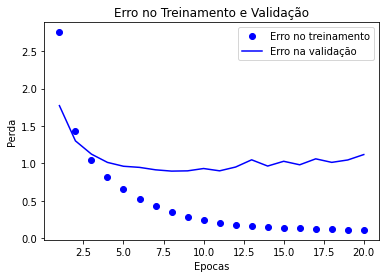

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Erro no treinamento')
plt.plot(epochs, val_loss, 'b', label='Erro na validação')
plt.title('Erro no Treinamento e Validação')
plt.xlabel('Epocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

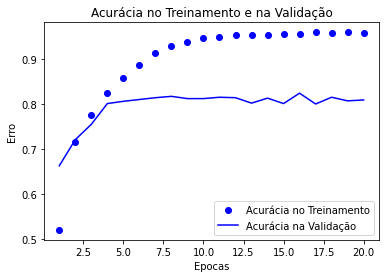

In [17]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Acurácia no Treinamento')
plt.plot(epochs, val_acc, 'b', label='Acurácia na Validação')
plt.title('Acurácia no Treinamento e na Validação')
plt.xlabel('Epocas')
plt.ylabel('Erro')
plt.legend()
plt.show()

Podemos observar que a partir da epoca 9 temos um overfitting, então vamos treinar nosso modelo novamente restringindo até a epoca 9 apenas. 

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
  loss='categorical_crossentropy',
  metrics=['accuracy'])
model.fit(partial_x_train,
  partial_y_train,
  epochs=9,
  batch_size=512,
  validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 53ms/step - loss: 2.6255 - accuracy: 0.5182 - val_loss: 1.7331 - val_accuracy: 0.6240
Epoch 2/9
16/16 [==============================] - 1s 43ms/step - loss: 1.4184 - accuracy: 0.7008 - val_loss: 1.3061 - val_accuracy: 0.7130
Epoch 3/9
16/16 [==============================] - 1s 42ms/step - loss: 1.0504 - accuracy: 0.7701 - val_loss: 1.1222 - val_accuracy: 0.7600
Epoch 4/9
16/16 [==============================] - 1s 43ms/step - loss: 0.8232 - accuracy: 0.8255 - val_loss: 1.0349 - val_accuracy: 0.7820
Epoch 5/9
16/16 [==============================] - 1s 43ms/step - loss: 0.6605 - accuracy: 0.8618 - val_loss: 0.9706 - val_accuracy: 0.7990
Epoch 6/9
16/16 [==============================] - 1s 42ms/step - loss: 0.5339 - accuracy: 0.8885 - val_loss: 0.9317 - val_accuracy: 0.8080
Epoch 7/9
16/16 [==============================] - 1s 44ms/step - loss: 0.4319 - accuracy: 0.9136 - val_loss: 0.9274 - val_accuracy: 0.8060
Epoch 8/9
16/16 [===

In [19]:
results
#Acurácia de 78%. 

[0.9791804552078247, 0.780053436756134]